In [1]:
# Cell 1: Setup and Imports
# ==============================================================================
# This cell sets up the Python path to find your envnet library and imports
# all the necessary modules for the analysis.

import pandas as pd
import os
import sys
import matplotlib.pyplot as plt

# --- Configure Python Path ---
# Add the root of your envnet repository to the Python path.
# Adjust this path if your notebook is in a different location.
PYTHONPATH = "/global/homes/b/bpb/repos/envnet"
if PYTHONPATH not in sys.path:
    sys.path.insert(0, PYTHONPATH)

# --- Import ENVnet Modules ---
from envnet.config.analysis_config import AnalysisConfig
from envnet.analysis.core import AnalysisEngine  # CORRECTED: Use AnalysisEngine

print("Setup complete. ENVnet modules imported successfully.")

Setup complete. ENVnet modules imported successfully.


In [2]:
# Cell 2: Configuration
# ==============================================================================
# Create an analysis configuration object and specify the paths to your
# input files.

# --- !! IMPORTANT: SET YOUR FILE PATHS HERE !! ---
# Define the main directory where your build results are located.
# results_dir = "/global/u2/b/bpb/repos/envnet/results/full_build_20250908_181404"
results_dir = '/pscratch/sd/b/bpb/envnet_annotation_results/'
# Path to the metadata file that maps filenames to environmental classes.
# This file was likely generated during the build process.
metadata_file = os.path.join("/global/u2/b/bpb/repos/envnet/results/full_build_20250908_181404", "input_for_annotation.csv")

# --- Create and Populate the AnalysisConfig ---
config = AnalysisConfig()

# Set the paths for the annotation results files from your config.
config.ms1_results_file = os.path.join(results_dir, "ms1_results_build_files_for_paper", "ms1_annotations.parquet")
config.ms2_deconv_results_file = os.path.join(results_dir, "ms2_results_build_files_for_paper", "ms2_deconvoluted_annotations.parquet")

print("Configuration define:")
print(f"  MS1 Results: {config.ms1_results_file}")
print(f"  MS2 Results: {config.ms2_deconv_results_file}")
print(f"  Metadata File: {metadata_file}")

Configuration define:
  MS1 Results: /pscratch/sd/b/bpb/envnet_annotation_results/ms1_results_build_files_for_paper/ms1_annotations.parquet
  MS2 Results: /pscratch/sd/b/bpb/envnet_annotation_results/ms2_results_build_files_for_paper/ms2_deconvoluted_annotations.parquet
  Metadata File: /global/u2/b/bpb/repos/envnet/results/full_build_20250908_181404/input_for_annotation.csv


In [3]:
# # # engine.file_metadata.loc[0]
# import pandas as pd
# filename = '/global/homes/b/bpb/repos/envnet/results/full_build_20250908_181404/ms2_results/ms2_deconvoluted_annotations.parquet'
# # ms1_filename = '/global/homes/b/bpb/repos/envnet/results/full_build_20250908_181404/ms1_results/ms1_annotations.parquet'
# df = pd.read_parquet(filename)
# # ms1_df = pd.read_parquet(ms1_filename)
# # print(ms1_df.shape)
# # ms1_df = ms1_df[ms1_df['original_index'].isin(df['original_index'].unique())]
# # print(ms1_df.shape)
# df.head()

In [4]:
# print(df.columns)

In [5]:
# Cell 3: Load and Prepare Data
# ==============================================================================
# Use the AnalysisEngine to load and prepare the data.

# Initialize the engine with our configuration.
engine = AnalysisEngine(config)

try:
    # Step 1: Load the raw data using the engine's loading method
    engine.load_annotation_results(file_metadata=metadata_file)
    
    # Step 2: Prepare the data for analysis using the engine's preparation method
    analysis_df = engine.prepare_analysis_data(require_ms2_support=False)
    # set to true for upset plot
    
    print("\nData loaded and prepared successfully.")
    print(f"Total records in final DataFrame: {len(analysis_df)}")
    print(f"Unique features/compounds: {analysis_df['original_index'].nunique()}")
    print("Columns:", analysis_df.columns.tolist())
    
    analysis_df.head()

except (FileNotFoundError, ValueError) as e:
    print(f"\nError: {e}")
    print("Please ensure the file paths in Cell 2 are correct and data was loaded.")

Loading annotation results...
Loaded MS1 data: 26964953 records
Filtering MS2 deconvoluted data by score and match thresholds
Initial MS2 deconvoluted data records: 8627664
Score threshold: 0.7, Match threshold: 3
Filtered MS2 deconvoluted data records: 4080196
Loaded MS2 deconvoluted data: 4080196 records
Loaded MS1 data: 26964953 records
Loaded MS2 deconv data: 4080196 records
Loaded MS2 original data: 0 records
Preparing analysis data...
analysis columns: ['original_index', 'num_datapoints', 'rt_peak', 'peak_height', 'peak_area', 'lcmsrun_observed']
file metadata columns: ['parquet', 'h5', 'environmental_subclass', 'lcmsrun_observed', 'original_file_type']


/global/homes/b/bpb/repos/envnet/envnet/analysis/dataloading.py:187: FutureWarning: The default value of regex will change from True to False in a future version.
  file_metadata['filename'] = file_metadata['h5'].str.replace('.h5', '')


Analysis filename:  /global/cfs/cdirs/metatlas/projects/envnet_build_files/metatlas/20230223_EB_MdR_101544-059_SynDAC_20230223_QE144_C18-EP_USDAY72350_NEG_MS2_29_RS-HA-NA_1__18
File metadata filename:  /global/cfs/cdirs/metatlas/projects/envnet_build_files/metatlas/20230223_EB_MdR_101544-059_SynDAC_20230223_QE144_C18-EP_USDAY72350_NEG_MS2_29_RS-HA-NA_1__18
Prepared data: 26964953 records

Data loaded and prepared successfully.
Total records in final DataFrame: 26964953
Unique features/compounds: 22128
Columns: ['original_index', 'num_datapoints', 'rt_peak', 'peak_height', 'peak_area', 'lcmsrun_observed', 'environmental_subclass', 'original_file_type']


In [6]:
analysis_df.head()

,original_index,num_datapoints,rt_peak,peak_height,peak_area,lcmsrun_observed,environmental_subclass,original_file_type
0,14,230,0.695280,5.124522e+05,1.087487e+07,/global/cfs/cdirs/metatlas/projects/envnet_bui...,Suwannee River Humic Acid Standard III,h5
1,180,339,0.504443,2.285611e+05,2.073185e+07,/global/cfs/cdirs/metatlas/projects/envnet_bui...,Suwannee River Humic Acid Standard III,h5
2,1043,1237,0.504443,1.700601e+06,1.785668e+08,/global/cfs/cdirs/metatlas/projects/envnet_bui...,Suwannee River Humic Acid Standard III,h5
3,3049,784,11.022525,8.849288e+04,2.036191e+07,/global/cfs/cdirs/metatlas/projects/envnet_bui...,Suwannee River Humic Acid Standard III,h5
4,3297,604,0.661214,2.323593e+05,1.032312e+07,/global/cfs/cdirs/metatlas/projects/envnet_bui...,Suwannee River Humic Acid Standard III,h5


In [7]:
from envnet.annotation.core import AnnotationEngine
annotation_engine = AnnotationEngine()
ref_dir = '/global/homes/b/bpb/repos/envnet/results/full_build_20250908_181404/'
node_data = annotation_engine.load_envnet_reference(
    graphml_file=os.path.join(ref_dir, "network_with_sirius.graphml"),
    mgf_base_name=os.path.join(ref_dir, "envnet")
)   


cols = ['original_index','precursor_mz','inchi_key', 'compound_name', 'smiles','NPC#pathway', 'NPC#superclass', 'NPC#class','predicted_formula', 'dbe', 'dbe_ai',
       'dbe_ai_mod', 'ai_mod', 'ai', 'nosc', 'h_to_c', 'o_to_c', 'n_to_c',
       'p_to_c', 'c', 'h', 'o', 'n', 's', 'p']
node_data = node_data['nodes'][cols]


model_data = pd.read_csv('../envnet/data/node_data_with_predicted_unchanged.csv')
node_data = node_data.merge(model_data, on='original_index', how='left')

node_data.head()


Loading ENVnet reference data...
  GraphML file: /global/homes/b/bpb/repos/envnet/results/full_build_20250908_181404/network_with_sirius.graphml
  Deconvoluted MGF: /global/u2/b/bpb/repos/envnet/data//global/homes/b/bpb/repos/envnet/results/full_build_20250908_181404/envnet_deconvoluted_spectra.mgf
  Original MGF: /global/u2/b/bpb/repos/envnet/data//global/homes/b/bpb/repos/envnet/results/full_build_20250908_181404/envnet_original_spectra.mgf
Loaded 22128 ENVnet nodes


,original_index,precursor_mz,inchi_key,compound_name,smiles,NPC#pathway,NPC#superclass,NPC#class,predicted_formula,dbe,...,n_to_c,p_to_c,c,h,o,n,s,p,predicted_unchanged_in_soil,predicted_unchanged_in_soil_prob
0,829769,243.196493,JYZJYKOZGGEXSX-UHFFFAOYSA-N,2-hydroxymyristic acid,CCCCCCCCCCCCC(O)C(=O)O,Fatty acids,Fatty Acids and Conjugates,Hydroxy fatty acids,C14H28O3,1.0,...,0.0,0.0,14.0,28.0,3.0,0.0,0.0,0.0,0,0.021333
1,758394,239.164958,LZEAYFSRBRGLSF-UHFFFAOYSA-N,Dicyclohexyl(hydroxy)acetic acid,O=C(O)C(O)(C1CCCCC1)C1CCCCC1,Fatty acids,Fatty Acids and Conjugates,Unsaturated fatty acids,C14H24O3,3.0,...,0.0,0.0,14.0,24.0,3.0,0.0,0.0,0.0,1,0.970848
2,673714,229.180486,HSRAJJQTYQHRSA-UHFFFAOYSA-N,O-11,CCCOCCCCCCCCCC(=O)O,Fatty acids,Fatty Acids and Conjugates,Hydroxy fatty acids,C13H26O3,1.0,...,0.0,0.0,13.0,26.0,3.0,0.0,0.0,0.0,1,0.877372
3,973799,259.191387,NaN,NaN,NaN,Fatty acids,Fatty Acids and Conjugates,Dicarboxylic acids,C14H28O4,1.0,...,0.0,0.0,14.0,28.0,4.0,0.0,0.0,0.0,1,0.805957
4,1137876,273.207727,NaN,NaN,NaN,Fatty acids,Fatty Acids and Conjugates,Hydroxy fatty acids,C15H30O4,1.0,...,0.0,0.0,15.0,30.0,4.0,0.0,0.0,0.0,1,0.917521


contains_sulfur: 4858 (21.95%)
contains_nitrogen: 8054 (36.40%)
contains_phosphorus: 1706 (7.71%)
contains_none: 10887 (49.20%)


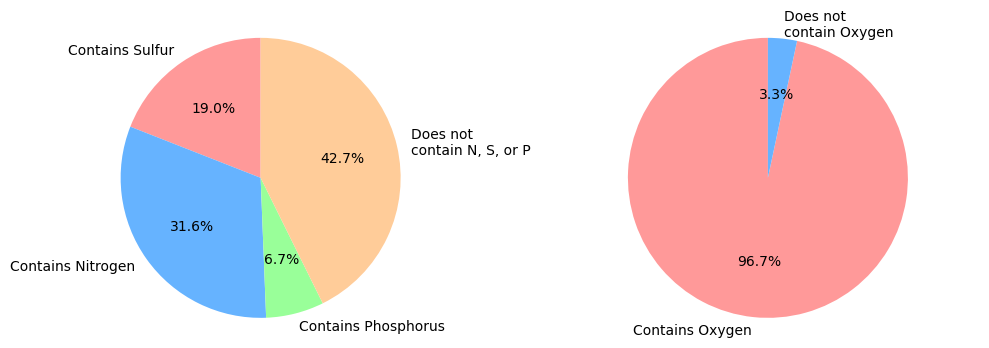

In [8]:
formula_node = node_data.loc[node_data['predicted_formula'].notnull(),['original_index','predicted_formula']].copy()
formula_node['contains_sulfur'] = formula_node['predicted_formula'].str.contains('S')
formula_node['contains_nitrogen'] = formula_node['predicted_formula'].str.contains('N')
formula_node['contains_phosphorus'] = formula_node['predicted_formula'].str.contains('P')
formula_node['contains_none'] = ~(formula_node['contains_sulfur'] | formula_node['contains_nitrogen'] | formula_node['contains_phosphorus'])
total_pie = formula_node.shape[0]
cols = [c for c in formula_node.columns if c.startswith('contains_')]
for c in cols:
    count = formula_node[formula_node[c]==True].shape[0]
    print(f"{c}: {count} ({count/total_pie:.2%})")
# make a pie chart
labels = ['Contains Sulfur', 'Contains Nitrogen', 'Contains Phosphorus', 'Does not\ncontain N, S, or P']
sizes = [
    formula_node['contains_sulfur'].sum(),
    formula_node['contains_nitrogen'].sum(),
    formula_node['contains_phosphorus'].sum(),
    formula_node['contains_none'].sum()
]
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
fig1, ax1 = plt.subplots(nrows=1,ncols=2, figsize=(12,4))
ax1[0].pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
ax1[0].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# make one for contains oxygen or not
formula_node['contains_oxygen'] = formula_node['predicted_formula'].str.contains('O')
labels_oxygen = ['Contains Oxygen', 'Does not\ncontain Oxygen']
sizes_oxygen = [
    formula_node['contains_oxygen'].sum(),
    (~formula_node['contains_oxygen']).sum()
]
colors_oxygen = ['#ff9999', '#66b3ff']
ax1[1].pie(sizes_oxygen, labels=labels_oxygen, colors=colors_oxygen, autopct='%1.1f%%', startangle=90)
ax1[1].axis('equal')

plt.show()


In [ ]:
# since CANOPUS was included in this build, almost all nodes get a class assignment and essentially all classes are in all environments so the previous analysis is not meaningful.
    # ms2_support_score_threshold: float = 0.7  # Minimum score to consider MS2 support
    # ms2_support_match_threshold: int = 3  # Minimum number of matches to consider MS2 support

# # for each "NPC#class" get the numbe of unique environments "name" and number of unique nodes "original index"
# g = class_dist_df.groupby(['NPC#class','original_index']).agg(
#     num_environments = ('common parent name', 'nunique'),
#     num_nodes = ('original_index', 'nunique')
# ).reset_index()
# # g = g.sort_values('num_environments', ascending=False)
# # group by NPC#class and calculate median number of environments and number of unique original_index
# class_summary = g.groupby('NPC#class').agg(
#     median_num_environments = ('num_environments', 'median'),
#     unique_nodes = ('original_index', 'nunique')
# ).reset_index()
# class_summary = class_summary.sort_values('median_num_environments', ascending=False)
# class_summary.tail(20)

Loading annotation results...
Loaded MS1 data: 26964953 records
Filtering MS2 deconvoluted data by score and match thresholds
Initial MS2 deconvoluted data records: 8627664
Score threshold: 0.7, Match threshold: 3
Filtered MS2 deconvoluted data records: 4080196
Loaded MS2 deconvoluted data: 4080196 records
Loaded MS1 data: 26964953 records
Loaded MS2 deconv data: 4080196 records
Loaded MS2 original data: 0 records
Preparing analysis data...
MS2 filtering: 26964953 -> 1207659 features
analysis columns: ['original_index', 'num_datapoints', 'rt_peak', 'peak_height', 'peak_area', 'lcmsrun_observed', 'filename']
file metadata columns: ['parquet', 'h5', 'environmental_subclass', 'lcmsrun_observed', 'original_file_type']
Analysis filename:  /global/cfs/cdirs/metatlas/projects/envnet_build_files/metatlas/20230223_EB_MdR_101544-059_SynDAC_20230223_QE144_C18-EP_USDAY72350_NEG_MS2_29_RS-HA-NA_1__18
File metadata filename:  /global/cfs/cdirs/metatlas/projects/envnet_build_files/metatlas/20230223_E

/global/homes/b/bpb/repos/envnet/envnet/analysis/dataloading.py:187: FutureWarning: The default value of regex will change from True to False in a future version.
  file_metadata['filename'] = file_metadata['h5'].str.replace('.h5', '')


Prepared data: 1207659 records


,original_index,num_datapoints,rt_peak,peak_height,peak_area,lcmsrun_observed,environmental_subclass,original_file_type,id,common parent name,...,n_to_c,p_to_c,c,h,o,n,s,p,predicted_unchanged_in_soil,predicted_unchanged_in_soil_prob
0,27212,664,0.661214,2.388780e+05,1.688576e+07,/global/cfs/cdirs/metatlas/projects/envnet_bui...,Suwannee River Humic Acid Standard III,h5,Suwannee River Humic Acid Standard III,IHSS Reference Standards,...,0.0,0.0,5.0,6.0,3.0,0.0,0.0,0.0,1,0.965834
1,40408,11,11.175333,7.207986e+03,2.766782e+04,/global/cfs/cdirs/metatlas/projects/envnet_bui...,Suwannee River Humic Acid Standard III,h5,Suwannee River Humic Acid Standard III,IHSS Reference Standards,...,0.25,0.0,4.0,5.0,4.0,1.0,0.0,0.0,1,0.515792
2,41019,506,1.645083,1.207952e+06,4.741983e+07,/global/cfs/cdirs/metatlas/projects/envnet_bui...,Suwannee River Humic Acid Standard III,h5,Suwannee River Humic Acid Standard III,IHSS Reference Standards,...,0.0,0.0,5.0,8.0,4.0,0.0,0.0,0.0,1,0.989028
3,41232,506,1.645083,1.207952e+06,4.741983e+07,/global/cfs/cdirs/metatlas/projects/envnet_bui...,Suwannee River Humic Acid Standard III,h5,Suwannee River Humic Acid Standard III,IHSS Reference Standards,...,0.0,0.0,5.0,8.0,4.0,0.0,0.0,0.0,1,0.993418
4,47875,234,2.484806,1.653001e+06,1.167420e+07,/global/cfs/cdirs/metatlas/projects/envnet_bui...,Suwannee River Humic Acid Standard III,h5,Suwannee River Humic Acid Standard III,IHSS Reference Standards,...,0.142857,0.0,7.0,9.0,2.0,1.0,0.0,0.0,1,0.961483
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1207654,3993690,934,9.767608,2.484753e+05,2.176440e+07,/global/cfs/cdirs/metatlas/projects/envnet_bui...,ENVO:00000134,h5,ENVO:00000134,soil,...,0.266667,0.0,15.0,12.0,5.0,4.0,3.0,0.0,0,0.049305
1207655,4410103,693,13.908816,3.053429e+05,1.318233e+07,/global/cfs/cdirs/metatlas/projects/envnet_bui...,ENVO:00000134,h5,ENVO:00000134,soil,...,0.0,0.0,14.0,16.0,11.0,0.0,3.0,0.0,0,0.302025
1207656,4528848,441,13.908816,5.210961e+04,2.553546e+06,/global/cfs/cdirs/metatlas/projects/envnet_bui...,ENVO:00000134,h5,ENVO:00000134,soil,...,0.0,0.0,14.0,16.0,12.0,0.0,3.0,0.0,0,0.233743
1207657,4535929,6,9.844452,1.474928e+04,3.811511e+04,/global/cfs/cdirs/metatlas/projects/envnet_bui...,ENVO:00000134,h5,ENVO:00000134,soil,...,0.285714,0.0,14.0,10.0,7.0,4.0,4.0,0.0,0,0.035036


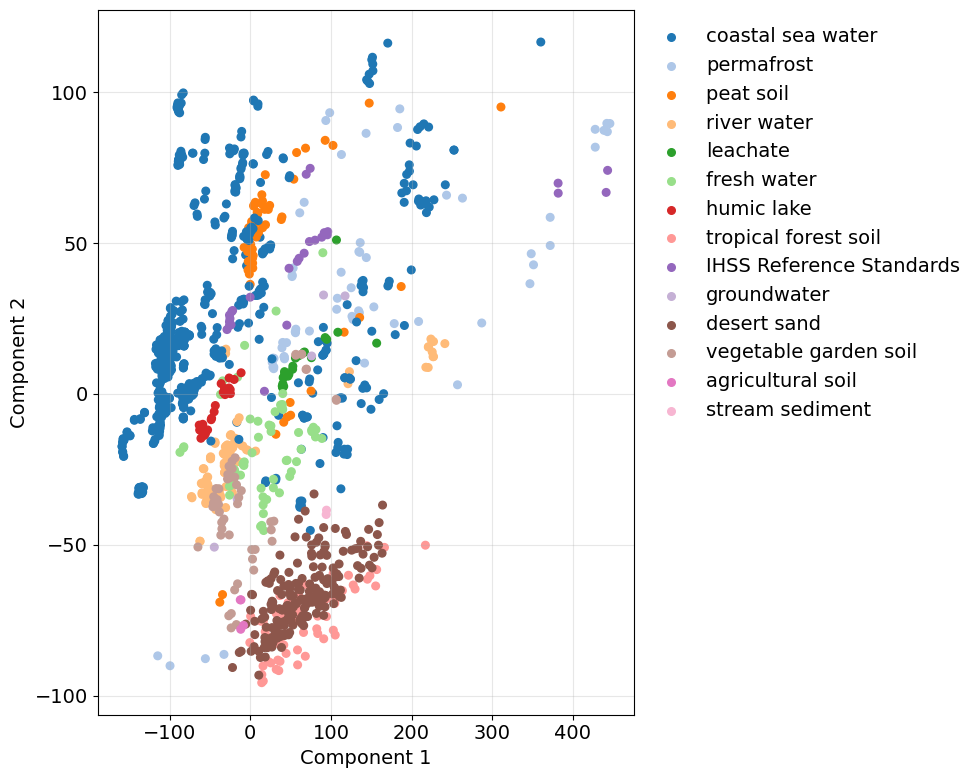

In [ ]:
# 1. Get the prepared data from the engine. 
#    At this point, it's the same as the 'analysis_df' you created earlier.
engine = AnalysisEngine(config)
engine.load_annotation_results(file_metadata=metadata_file)
prepared_data = engine.prepare_analysis_data(require_ms2_support=False)
import numpy as np
# 2. Perform the merge to create a new, specific DataFrame for this PCA analysis.
#    This is the same merge you did before.
envo_df = pd.read_csv('/global/homes/b/bpb/repos/envnet/envnet/data/envo_relationships.csv')
cols = ['id', 'common parent name','name']
pca_input_df = pd.merge(prepared_data, envo_df[cols], left_on='environmental_subclass', right_on='id', how='left')
# pca_input_df['peak_area'] = pca_input_df['peak_area'].fillna(0)
# pca_input_df['peak_area'] = pca_input_df['peak_area'].apply(np.log1p)
# (Optional but recommended) Add a quick check to ensure the column exists before plotting
pca_results = engine.multivariate.run_pca(data=pca_input_df, grouping_column='name',    highlight_group=None,
                                          method='pca')
# (Using the pca_input_df from the previous step)


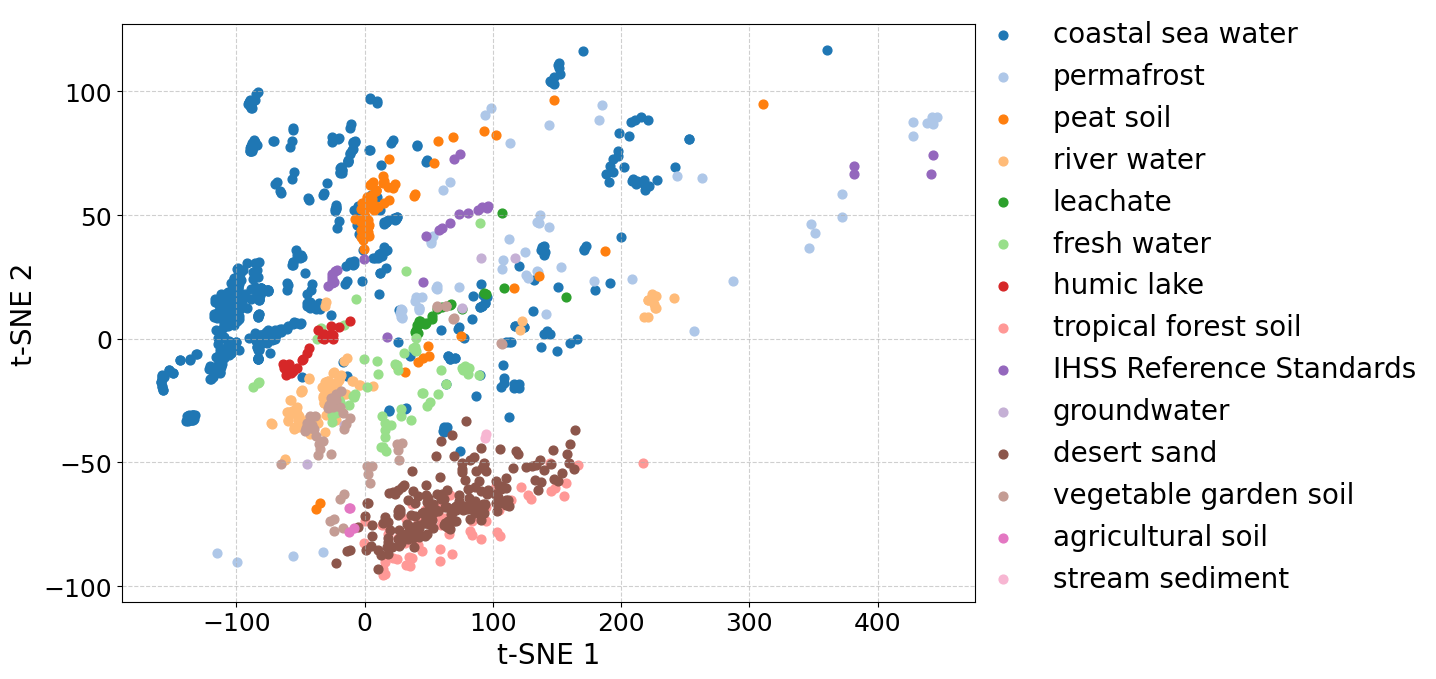

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# --- 1. Extract the necessary data from your pca_results dictionary ---
# This contains the X and Y coordinates for each point
X_pca = pca_results['pca_coordinates']

# This is a pandas Series with the group name (e.g., 'coastal sea water') for each point
groups = pca_results['sample_groups']

# This contains the percentage of variance explained by each component
explained_variance = None #pca_results['explained_variance']


# --- 2. Set up the plot aesthetics ---
# Get a list of the unique environment names to create a consistent color map
unique_groups = groups.unique()
colors = dict(zip(unique_groups, plt.cm.tab20.colors[:len(unique_groups)]))


# --- 3. Create the new, improved plot ---
# Create a figure with a wider aspect ratio (e.g., 12 inches wide by 8 inches tall)
fig, ax = plt.subplots(figsize=(17, 7))

# Plot each group of points separately so we can build the legend automatically
for group in unique_groups:
    # Find the indices for the points belonging to the current group
    idx = (groups == group)
    ax.scatter(
        X_pca[idx, 0], 
        X_pca[idx, 1], 
        color=colors[group],
        label=group,
        alpha=1, 
        s=40  # Adjust point size if desired
    )

# --- 4. Customize labels, title, and font sizes ---
# Calculate the percentage of variance for the labels
pc1_var = explained_variance[0] * 100 if explained_variance is not None else None
pc2_var = explained_variance[1] * 100 if explained_variance is not None else None

# Set labels and title with larger fonts
ax.set_xlabel(f'Component 1 ({pc1_var:.1f}%)' if pc1_var is not None else 't-SNE 1', fontsize=20)
ax.set_ylabel(f'Component 2 ({pc2_var:.1f}%)' if pc2_var is not None else 't-SNE 2', fontsize=20)
# Increase the font size of the tick labels on both axes
ax.tick_params(axis='both', which='major', labelsize=18)

# Create the legend with a larger font and place it outside the plot area
ax.legend(bbox_to_anchor=(0.97, 1.05), loc='upper left', fontsize=20,frameon=False)

# Add a grid for better readability
ax.grid(True, linestyle='--', alpha=0.6)

# Adjust the plot layout to make sure the legend doesn't get cut off
plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()

Loading annotation results...
Loaded MS1 data: 26964953 records
Filtering MS2 deconvoluted data by score and match thresholds
Initial MS2 deconvoluted data records: 8627664
Score threshold: 0.5, Match threshold: 3
Filtered MS2 deconvoluted data records: 8627647
Loaded MS2 deconvoluted data: 8627647 records
Loaded MS1 data: 26964953 records
Loaded MS2 deconv data: 8627647 records
Loaded MS2 original data: 0 records
Preparing analysis data...
MS2 filtering: 26964953 -> 1996326 features
analysis columns: ['original_index', 'num_datapoints', 'rt_peak', 'peak_height', 'peak_area', 'lcmsrun_observed', 'filename']
file metadata columns: ['parquet', 'h5', 'environmental_subclass', 'lcmsrun_observed', 'original_file_type']
Analysis filename:  /global/cfs/cdirs/metatlas/projects/envnet_build_files/metatlas/20230223_EB_MdR_101544-059_SynDAC_20230223_QE144_C18-EP_USDAY72350_NEG_MS2_29_RS-HA-NA_1__18
File metadata filename:  /global/cfs/cdirs/metatlas/projects/envnet_build_files/metatlas/20230223_E

/global/homes/b/bpb/repos/envnet/envnet/analysis/dataloading.py:187: FutureWarning: The default value of regex will change from True to False in a future version.
  file_metadata['filename'] = file_metadata['h5'].str.replace('.h5', '')


Prepared data: 1996326 records


/tmp/ipykernel_1612404/1046802547.py:76: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


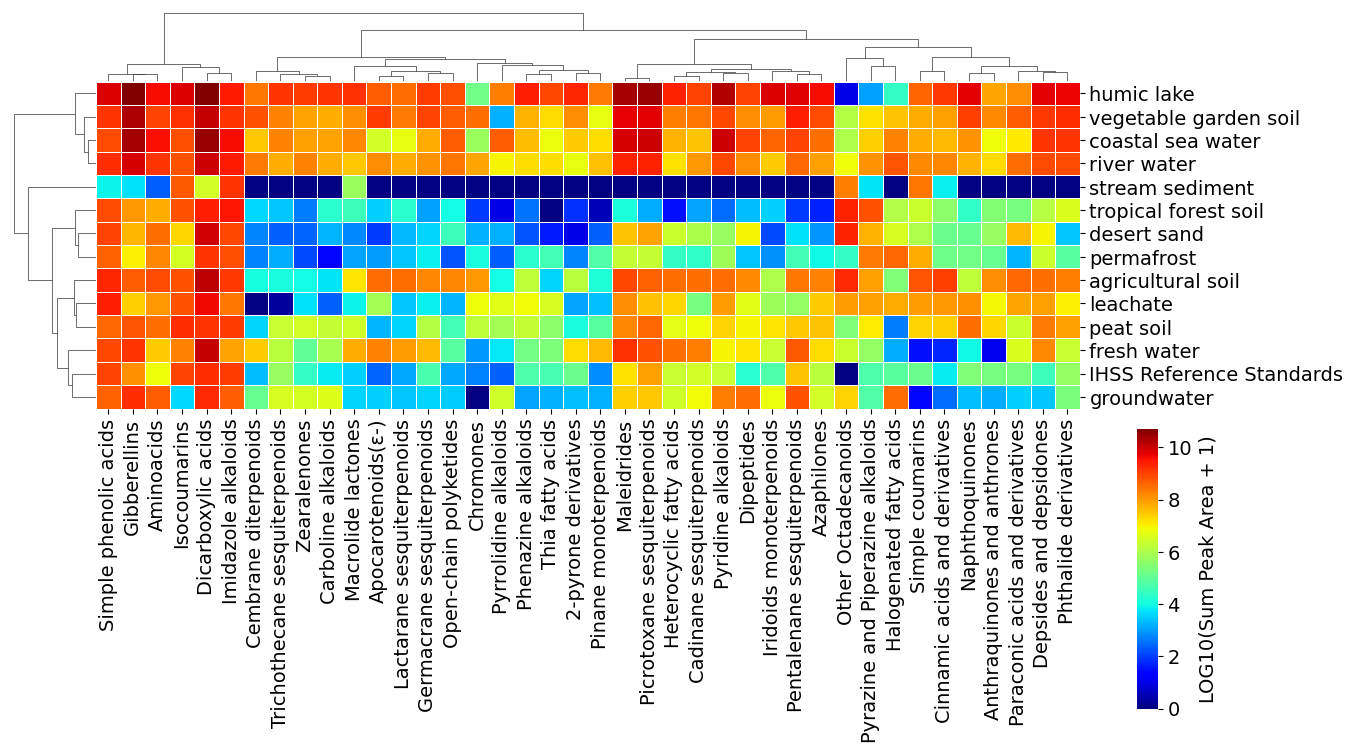

In [12]:

config.ms2_support_score_threshold = 0.5
config.ms2_support_match_threshold = 3
engine = AnalysisEngine(config)
engine.load_annotation_results(file_metadata=metadata_file)
class_dist_df = engine.prepare_analysis_data(require_ms2_support=True)
import numpy as np
# 2. Perform the merge to create a new, specific DataFrame for this PCA analysis.
#    This is the same merge you did before.
envo_df = pd.read_csv('/global/homes/b/bpb/repos/envnet/envnet/data/envo_relationships.csv')
cols = ['id', 'common parent name','name']
class_dist_df = pd.merge(class_dist_df, envo_df[cols], left_on='environmental_subclass', right_on='id', how='left')
class_dist_df = pd.merge(class_dist_df, node_data, on='original_index', how='left')
class_dist_df


import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

p = pd.pivot_table(
    class_dist_df,
    index=['lcmsrun_observed', 'environmental_subclass', 'common parent name', 'name'],
    columns='NPC#class',
    values='peak_area',
    aggfunc=np.sum,
    fill_value=0  # changed from 1 to 0
)

# Apply log transformation with small offset to avoid log(0)
p = np.log10(p + 1)  # adding 1 instead of log10 directly

# Aggregate by environment
df = p.reset_index()
env_column = 'name'

# Calculate mean abundance of each compound class in each environment
env_class_means = df.groupby(env_column)[p.columns].mean()

# Filter to top N compound classes
n_classes_to_show = 40
overall_abundance = env_class_means.mean(axis=0).sort_values(ascending=False)
top_classes = overall_abundance.head(n_classes_to_show).index
env_class_subset = env_class_means[top_classes]

# Clean the data: ensure it's float64 and has no NaN/inf
env_class_subset = env_class_subset.astype(np.float64)
env_class_subset = env_class_subset.replace([np.inf, -np.inf], np.nan)
env_class_subset = env_class_subset.fillna(0)

# Create clustermap with Ward linkage
g = sns.clustermap(env_class_subset, 
                   cmap='jet',
                   figsize=(14, 8),
                   dendrogram_ratio=(0.08, 0.18),
                   cbar_pos=(0.82, 0.1, 0.015, 0.35),
                   linewidths=0.5,
                   linecolor='white',
                   method='ward',  # explicitly specify ward linkage
                   metric='euclidean',  # ward requires euclidean
                   z_score=None,
                   cbar_kws={'label': 'LOG10(Sum Peak Area + 1)'})

g.ax_heatmap.set_xlabel('')
g.ax_heatmap.set_ylabel('')

g.ax_heatmap.set_xticklabels(g.ax_heatmap.get_xticklabels(), 
                             rotation=90, 
                             ha='center',
                             fontsize=14)

g.ax_heatmap.set_yticklabels(g.ax_heatmap.get_yticklabels(), 
                             rotation=0, 
                             fontsize=14)

plt.tight_layout()
plt.savefig('clustermap_zscore.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
envo_df = pd.read_csv('/global/homes/b/bpb/repos/envnet/envnet/data/envo_relationships.csv')
cols = ['id', 'common parent name']
engine.merged_data = pd.merge(engine.merged_data, envo_df[cols], left_on='environmental_subclass', right_on='id', how='left')
engine.merged_data.head()

In [ ]:
pca_results = engine.multivariate.run_pca(data=engine.merged_data, grouping_column='environmental_subclass')


In [11]:
build_files = pd.read_csv('/global/homes/b/bpb/repos/envnet/scripts/build_files.csv')
envo_df = pd.read_csv('/global/homes/b/bpb/repos/envnet/envnet/data/envo_relationships.csv')

cols = ['id', 'common parent name']
build_files = pd.merge(build_files, envo_df[cols], left_on='environmental_subclass', right_on='id', how='left')
build_files.groupby('common parent name').size().reset_index(name='counts').sort_values('counts', ascending=False)

,common parent name,counts
2,sea water,698
3,soil,443
1,fresh water,221
0,IHSS Reference Standards,27


In [12]:
from multiprocessing import Pool
import pandas as pd

def count_ms2_spectra(filename):
    """Count unique retention times in MS2 data from HDF5 file."""
    try:
        df = pd.read_hdf(filename, key='ms2_neg')
        return df['rt'].nunique()
    except Exception as e:
        print(f"Error processing {filename}: {e}")
        return 0

# Use multiprocessing to accelerate counting
with Pool(20) as pool:
    build_files['num_ms2'] = pool.map(count_ms2_spectra, build_files['h5'])

print(f"Processed {len(build_files)} files")
print(f"Total MS2 spectra: {build_files['num_ms2'].sum()}")


Processed 1389 files
Total MS2 spectra: 5551788


In [13]:
build_files.groupby('common parent name')['num_ms2'].sum().reset_index(name='total_ms2').sort_values('total_ms2', ascending=False)

,common parent name,total_ms2
2,sea water,3116783
3,soil,1538424
1,fresh water,802481
0,IHSS Reference Standards,94100


In [14]:
def get_numdeconvoluted(filename):
    """Count unique retention times in MS2 data from HDF5 file."""
    try:
        df = pd.read_parquet(filename)
        return df.shape[0]
    except Exception as e:
        print(f"Error processing {filename}: {e}")
        return 0

# Use multiprocessing to accelerate counting
with Pool(20) as pool:
    build_files['num_deconvoluted'] = pool.map(get_numdeconvoluted, build_files['parquet'])

print(f"Processed {len(build_files)} files")
print(f"Total deconvoluted spectra: {build_files['num_deconvoluted'].sum()}")

Processed 1389 files
Total deconvoluted spectra: 4721219


In [15]:
build_files.groupby('common parent name')['num_deconvoluted'].sum().reset_index(name='total_deconvoluted').sort_values('total_deconvoluted', ascending=False)

,common parent name,total_deconvoluted
2,sea water,3307671
3,soil,685504
1,fresh water,684577
0,IHSS Reference Standards,43467


Loading annotation results...
Loaded MS1 data: 26964953 records
Filtering MS2 deconvoluted data by score and match thresholds
Initial MS2 deconvoluted data records: 8627664
Score threshold: 0.5, Match threshold: 3
Filtered MS2 deconvoluted data records: 8627647
Loaded MS2 deconvoluted data: 8627647 records
Loaded MS1 data: 26964953 records
Loaded MS2 deconv data: 8627647 records
Loaded MS2 original data: 0 records
Preparing analysis data...
MS2 filtering: 26964953 -> 1996326 features
analysis columns: ['original_index', 'num_datapoints', 'rt_peak', 'peak_height', 'peak_area', 'lcmsrun_observed', 'filename']
file metadata columns: ['parquet', 'h5', 'environmental_subclass', 'lcmsrun_observed', 'original_file_type']
Analysis filename:  /global/cfs/cdirs/metatlas/projects/envnet_build_files/metatlas/20230223_EB_MdR_101544-059_SynDAC_20230223_QE144_C18-EP_USDAY72350_NEG_MS2_29_RS-HA-NA_1__18
File metadata filename:  /global/cfs/cdirs/metatlas/projects/envnet_build_files/metatlas/20230223_E

/global/homes/b/bpb/repos/envnet/envnet/analysis/dataloading.py:187: FutureWarning: The default value of regex will change from True to False in a future version.
  file_metadata['filename'] = file_metadata['h5'].str.replace('.h5', '')


Prepared data: 1996326 records
Saved UpSet plot to: /global/homes/b/bpb/repos/envnet/results/full_build_20250908_181404/upset_plot_environmental_classes.pdf


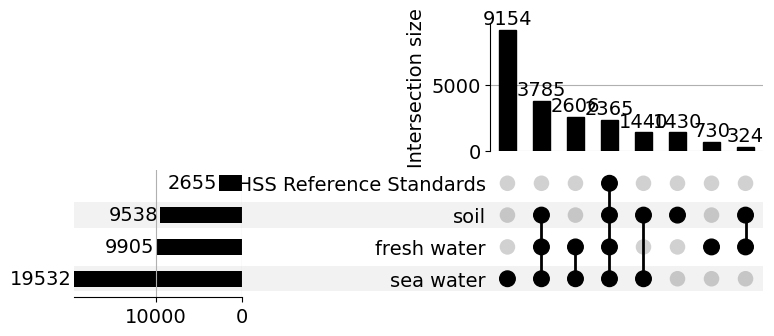

In [21]:
def prepare_upset_data(compound_dict):
    """Prepare data for UpSet plot."""
    # Convert dictionary to list of tuples
    data_tuples = [
        (env, compound) 
        for env, compounds in compound_dict.items() 
        for compound in compounds
    ]
    
    # Create DataFrame
    df = pd.DataFrame(data_tuples, columns=['Environment', 'Compound'])
    
    # Pivot to binary matrix
    binary_df = df.groupby('Compound')['Environment'].apply(
        lambda x: pd.Series(1, x)
    ).unstack().fillna(0).astype(bool)
    
    # Group by columns and count
    columns = binary_df.columns.tolist()
    grouped_counts = binary_df.groupby(columns).size()
    
    return grouped_counts


config.ms2_support_score_threshold = 0.5
config.ms2_support_match_threshold = 3
engine = AnalysisEngine(config)
engine.load_annotation_results(file_metadata=metadata_file)
upset_df = engine.prepare_analysis_data(require_ms2_support=True)

envo_df = pd.read_csv('/global/homes/b/bpb/repos/envnet/envnet/data/envo_relationships.csv')
cols = ['id', 'common parent name']
temp = pd.merge(upset_df, envo_df[cols], left_on='environmental_subclass', right_on='id', how='left')
temp.head()

grouped_compounds = temp.groupby('common parent name')['original_index'].unique()
compound_dict = grouped_compounds.to_dict()

# Convert to UpSet format
upset_data = prepare_upset_data(compound_dict)

# Create UpSet plot with larger totals plot
from upsetplot import plot

# Set rcParams for PDF export with embedded fonts
plt.rcParams['pdf.fonttype'] = 42  # TrueType fonts
plt.rcParams['ps.fonttype'] = 42   # TrueType fonts for PostScript
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial', 'DejaVu Sans', 'Helvetica']

# rotate the counts in the intersection plot for better readability
fig = plt.figure(figsize=(25, 7))
ax_dict = plot(
    upset_data, 
    fig=fig,
    sort_by='cardinality',
    show_counts=True,
    min_subset_size=100,
    totals_plot_elements=5,  # Make totals plot bigger (default is 2)
    intersection_plot_elements=4
)


# # Set y-axis limits for the totals (bottom left) plot
# set_size_ax = ax_dict['totals']
# set_size_ax.set_ylim(0, 20000)
# plt.tight_layout()

# Export as PDF with embedded fonts
output_pdf = '/global/homes/b/bpb/repos/envnet/results/full_build_20250908_181404/upset_plot_environmental_classes.pdf'
fig.savefig(output_pdf, format='pdf', bbox_inches='tight', dpi=300)
print(f'Saved UpSet plot to: {output_pdf}')

In [27]:
upset_data.to_frame(name='count').reset_index().to_csv('upset_data_environmental_classes.csv', index=False)

In [ ]:
PYTHONPATH = "/global/homes/b/bpb/repos/envnet"
if PYTHONPATH not in sys.path:
    sys.path.insert(0, PYTHONPATH)
import os
from envnet.annotation.core import AnnotationEngine
annotation_engine = AnnotationEngine()
ref_dir = '/global/homes/b/bpb/repos/envnet/results/full_build_20250908_181404/'
node_data = annotation_engine.load_envnet_reference(
    graphml_file=os.path.join(ref_dir, "network_with_sirius.graphml"),
    mgf_base_name=os.path.join(ref_dir, "envnet")
)   
# cols = [  'precursor_mz', 'isolated_precursor_mz','coisolated_precursor_count',
    #    'filename', 'rt', 'num_datapoints', 'peak_area', 'peak_height', 'mz_centroid', 'rt_peak']
df = node_data['nodes'].copy()

In [ ]:
import requests
import pandas as pd
url = "https://npclassifier.gnps2.org/classify"
df.reset_index(inplace=True,drop=True)
out = []
for i,row in df[pd.notna(df['inchi_key'])].iterrows(): # for some reason smiles is "" and not None
    # smiles = df.loc[0,'smiles_identity']
    r = requests.get(url, params={"smiles": row['smiles']})
    if r.status_code == 200:
        d = r.json()
    else:
        if 'C' in row['smiles']:
            print(row['smiles'])
        d = {'class_results': None,
                     'superclass_results': None,
                     'pathway_results': None,
                     'isglycoside': False}
    d['inchi_key'] = row['inchi_key']
    out.append(d)
out2 = pd.DataFrame(out)
cols = ['class_results', 'superclass_results', 'pathway_results']
for c in cols:
    out2[c] = out2[c].apply(lambda x: '|'.join(sorted(x)) if isinstance(x,list) else '')
out2.to_csv('../envnet/data/library_matches_npclassifier_results.csv', index=False)

In [ ]:
df = pd.merge(df, out2.add_suffix('_library_match'), left_on='inchi_key', right_on='inchi_key_library_match', how='left')
df.drop(columns=['inchi_key_library_match'], inplace=True)

In [ ]:
class_counts_library_match.index.tolist()[0]

In [ ]:
# in class_counts_library_match shorten
# Lanostane, Tirucallane and Euphane triterpenoids to
# Lanostane and other triterpenoids
def shorten_class_name(class_name):
    # the index will be the class name
    if 'Lanostane, Tirucallane and Euphane triterpenoids' in class_name:
        return class_name.replace('Lanostane, Tirucallane and Euphane triterpenoids', 'Lanostane and other triterpenoids')
    return class_name

In [ ]:
idx1 = pd.notna(df['NPC#class'])
idx2 = df['NPC#class'] != ''
idx = idx1 & idx2
class_counts = df.loc[idx,'NPC#class'].value_counts().head(60)
class_counts.index = class_counts.index.map(shorten_class_name)
idx1 = pd.notna(df['class_results_library_match'])
idx2 = df['class_results_library_match'] != ''
idx = idx1 & idx2
class_counts_library_match = df.loc[idx,'class_results_library_match'].value_counts()
class_counts_library_match.index = class_counts_library_match.index.map(shorten_class_name)
import matplotlib.pyplot as plt
my_indes = class_counts_library_match.index.intersection(class_counts.index)
# sort both by my_index
class_counts_library_match = class_counts_library_match.reindex(my_indes)

class_counts = class_counts.reindex(my_indes)
# plot side by side bar plot
fig,ax = plt.subplots(nrows=1,ncols=2, figsize=(7,19), sharey=True)
# bar plot orient horizontal share y axis to common class names
class_counts_library_match.plot(kind='barh', ax=ax[0], color='orange', alpha=0.5)
class_counts.plot(kind='barh', ax=ax[1])

ax[1].set_xlabel('Nodes (in silico)',fontsize=20)
ax[0].set_xlabel('Nodes (library match)',fontsize=20)

#  increase font size of tick labels
ax[0].tick_params(axis='both', labelsize=20)
ax[1].tick_params(axis='both', labelsize=20)

# remove top and right spines
for a in ax:
    a.spines['top'].set_visible(False)
    a.spines['right'].set_visible(False)

plt.show()


In [ ]:
engine.config.min_upset_subset_size = 1000

In [ ]:

fig = engine.generate_upset_plot(
    grouping_column='common parent name', fig_width=20, fig_height=10, 
)

plt.show() # Display the plot generated by the engine


In [ ]:
# get node data for most frequently occiring original indices
top_indices = analysis_df['original_index'].value_counts().head(10).index.tolist()

# in annotation module use the annotation engine to get node data with the function load_envnet_reference
# import nnotation module's engine
from envnet.annotation.core import AnnotationEngine
annotation_engine = AnnotationEngine()
node_data = annotation_engine.load_envnet_reference(
    graphml_file=os.path.join(results_dir, "network_with_sirius.graphml"),
    mgf_base_name=os.path.join(results_dir, "envnet")
)   


In [ ]:
class_term = 'NPC#class'
# class_term = 'NPC#superclass'
# class_term = 'NPC#pathway'
cols = ['original_index',class_term,'color_compound_class','smiles','compound_name']
df = pd.merge(analysis_df[['original_index','h5','environmental_subclass']], node_data['nodes'][cols], on='original_index', how='left')

In [ ]:
g = df.groupby('original_index').agg({'environmental_subclass':'nunique'})
g = pd.merge(g, node_data['nodes'][['original_index',class_term]].drop_duplicates(), left_index=True, right_on='original_index', how='left')
g = g[pd.notna(g[class_term])]
g = g.groupby(class_term).agg({'environmental_subclass':'median', 'original_index':'nunique'})
g = g[g['original_index'] > 10]
g.sort_values('environmental_subclass', ascending=False, inplace=True)
g = g.head(10)
fig,ax = plt.subplots(figsize=(6,6))
ax.barh(g.index, g['environmental_subclass'])


In [ ]:
# get both the node count and the unique environmental subclasses associated with each class_term
# count would be unique count of original_index
# unique would be unique count of environmental_subclass
g = df.groupby(class_term).agg({'original_index':'nunique', 'environmental_subclass':'nunique'})
g = g[g['original_index'] > 10]
g.sort_values('environmental_subclass', ascending=False, inplace=True)

In [ ]:
fig,ax = plt.subplots(figsize=(6,6))
ax.barh(g.index, g['environmental_subclass'])
# make y ticks smaller
ax.set_yticklabels(ax.get_yticklabels(), fontsize=8)
plt.show()

In [ ]:
g.tail(10)

In [ ]:
top_nodes = analysis_df['original_index'].value_counts().head(200).index.tolist()
top_nodes = node_data['nodes'][node_data['nodes']['original_index'].isin(top_nodes)].copy()
# top_nodes.columns
top_nodes


In [ ]:
# setup structure drawing with rdkit
smiles = [s for s in top_nodes['smiles'] if s is not np.nan]
from rdkit import Chem
from rdkit.Chem import Draw
mols = [Chem.MolFromSmiles(s) for s in smiles]
img = Draw.MolsToGridImage(mols, molsPerRow=5, subImgSize=(400,200),useSVG=True)
img

In [ ]:
# filename  = '/global/u2/b/bpb/repos/envnet/results/full_build_20250908_181404/ms1_results/ms1_annotations.parquet'
# import pyarrow.parquet as pq
# pf = pq.ParquetFile(filename)
# # Get an iterator for the first row group and read it as a batch
# first_rows_batch = next(pf.iter_batches(batch_size=10))
# # Convert the batch to a pandas DataFrame
# df_first_10 = first_rows_batch.to_pandas()
# df_first_10.columns

In [ ]:
# filename  = '/global/u2/b/bpb/repos/envnet/results/full_build_20250908_181404/ms2_results/ms2_deconvoluted_annotations.parquet'
# import pyarrow.parquet as pq
# pf = pq.ParquetFile(filename)
# # Get an iterator for the first row group and read it as a batch
# first_rows_batch = next(pf.iter_batches(batch_size=10))
# # Convert the batch to a pandas DataFrame
# df_first_10 = first_rows_batch.to_pandas()
# df_first_10.columns

In [ ]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
filename  = '/global/u2/b/bpb/repos/envnet/results/full_build_20250908_181404/ms2_results/ms2_deconvoluted_annotations.parquet'
# read first 10 rows of a parquet file
cols = ['ms2_data_index_deconvoluted_match', 'temp_index','ref_deconvoluted_match','score_deconvoluted_match', 'matches_deconvoluted_match',
       'precursor_mz_query_deconvoluted_match',
       'precursor_mz_ref_deconvoluted_match', 'mz_diff_deconvoluted_match',
       'rt', 'count','precursor_mz', 'filename', 'basename',
       'nearest_precursor', 'mz_diff', 'annotation_method', 'spectrum_type',
       'confidence_level']
df = pd.read_parquet(filename, columns=cols)
df.sort_values('score_deconvoluted_match', ascending=False, inplace=True)
df.drop_duplicates(subset=['filename','ref_deconvoluted_match'], keep='first', inplace=True)

ref_dir="/global/homes/b/bpb/repos/envnet/results/full_build_20250908_181404"
metadata_filename = os.path.join(ref_dir,'input_for_annotation.csv')
metadata_df = pd.read_csv(metadata_filename)
df = pd.merge(df,metadata_df[['h5','environmental_subclass']],left_on='filename', right_on='h5', how='left')

df.head()
# import pyarrow.parquet as pq
# pf = pq.ParquetFile(filename)
# # Get an iterator for the first row group and read it as a batch
# first_rows_batch = next(pf.iter_batches(batch_size=10))
# # Convert the batch to a pandas DataFrame
# df_first_10 = first_rows_batch.to_pandas()
# df_first_10.columns



In [ ]:
env_classes = pd.read_csv('/global/homes/b/bpb/repos/envnet/envnet/data/envo_relationships.csv')
env_classes

In [ ]:
env_df = df.drop_duplicates(subset=['environmental_subclass','ref_deconvoluted_match'], keep='first')
env_df = pd.merge(env_df, env_classes, left_on='environmental_subclass', right_on='id', how='left')

In [ ]:
import numpy as np
fig,ax = plt.subplots()
x = env_df.groupby('ref_deconvoluted_match')['common parent name'].nunique()
y,x = np.histogram(x.values,bins=4)
# y = y / df['ref_deconvoluted_match'].nunique()
# ax.set_xlabel('Number of environmental classes matched')
# ax.set_yscale('log')
ax.bar(x[:-1],y,width=np.diff(x), align='edge')
ax.set_xlabel('Number of environmental classes matched')
ax.set_ylabel('Number of envnet nodes')


In [ ]:

filename = '/global/homes/b/bpb/repos/envnet/scripts/my_files.csv'
df = pd.read_csv(filename)
# replace all text having 'carbon_network/raw_data' with 'envnet_build_files' in the entire dataframe
for c in df.columns:
    df[c] = df[c].str.replace('carbon_network/raw_data', 'envnet_build_files', regex=False)
df = df[~df['parquet'].str.contains('MSV000081030')]
idx = df['parquet'].str.contains('_deconvoluted.parquet')
df.loc[~idx,'parquet'] = df.loc[~idx,'parquet'].str.replace('.parquet','_deconvoluted.parquet', regex=False)
df['lcmsrun_observed'] = df['h5'].apply(lambda x: x.replace('.h5',''))
df['lcmsrun_observed'] = df['lcmsrun_observed'].str.replace('/global/cfs/cdirs/metatlas/projects/envnet_build_files/','', regex=False)
df['original_file_type'] = 'h5'
output_path = '/global/homes/b/bpb/repos/envnet/results/full_build_20250908_181404'
output_filename = os.path.join(output_path,'input_for_annotation.csv')
df.to_csv(output_filename, index=False)
print(f'Wrote {output_filename} with {len(df)} rows')

In [ ]:


# use recursive find to get all parquet files
# use linux find since it is much faster than glob
cmd = "find /global/cfs/cdirs/metatlas/projects/envnet_build_files/ -name '*_deconvoluted.parquet'"
# run command
result = subprocess.run(cmd, shell=True, capture_output=True, text=True)
files = result.stdout.splitlines()
len(files)
files = [f for f in files if "MSV000081030" not in f] # MetaboLights MTBLS144 - GNPS Dissolved organic matter produced by Thalassiosira pseudonana


# filename = '/global/homes/b/bpb/repos/envnet/scripts/my_files.csv'
# df = pd.read_csv(filename)
# # replace all text having 'carbon_network/raw_data' with 'envnet_build_files' in the entire dataframe
# for c in df.columns:
#     df[c] = df[c].str.replace('carbon_network/raw_data', 'envnet_build_files', regex=False)
# df = df[~df['parquet'].str.contains('MSV000081030')]
# idx = df['parquet'].str.contains('_deconvoluted.parquet')
# df.loc[~idx,'parquet'] = df.loc[~idx,'parquet'].str.replace('.parquet','_deconvoluted.parquet', regex=False)

# print(df.shape)
# df.to_csv('/global/homes/b/bpb/repos/envnet/scripts/build_files.csv', index=False)
# for f in df.head()['parquet'].tolist():
#     print(f)
#     print(os.path.exists(f))

In [ ]:
# # remove MSV000081030 files.  These seem to be not environmental

print(len(files))
# files = [f for f in files if "MSV000088008" not in f]

# # files = [f for f in files if "DOM_Interlab-LCMS_Lab024" not in f]
# len(files)

In [ ]:
import os
for f in files:
    mzml_filename = f.replace("_deconvoluted.parquet", ".mzML")
    h5_filename = f.replace("_deconvoluted.parquet", ".h5")
    if not os.path.exists(mzml_filename):
        print(f)
    if not os.path.exists(h5_filename):
        print(f)